In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# allow imports from project root
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# local helpers
from src.file_handling import load_raw_data, save_processed_data
import src.eda as eda_mod
from src.preprocess import preprocess_data, create_stratified_sample

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)

print("✓ Imports complete!")
print(f"Project root: {project_root}")

✓ Imports complete!
Project root: c:\Users\Acer\Documents\KAIM_PROJECT\TEST\rag-complaint-chatbot


In [2]:
raw_data_path = project_root / "data" / "raw" / "complaints.csv"

if not raw_data_path.exists():
    print(f"❌ File not found at: {raw_data_path}")
else:
    print(f"✓ Found data file at: {raw_data_path}")

df_raw = load_raw_data(raw_data_path)
print(f"✓ Loaded {len(df_raw):,} complaints")

✓ Found data file at: c:\Users\Acer\Documents\KAIM_PROJECT\TEST\rag-complaint-chatbot\data\raw\complaints.csv
✓ Loaded 9,609,797 DATA from complaints.csv
✓ Loaded 9,609,797 complaints


## 1. Initial EDA

### Analyze product distribution.

c:\Users\Acer\Documents\KAIM_PROJECT\TEST\rag-complaint-chatbot\src\eda.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette="viridis")


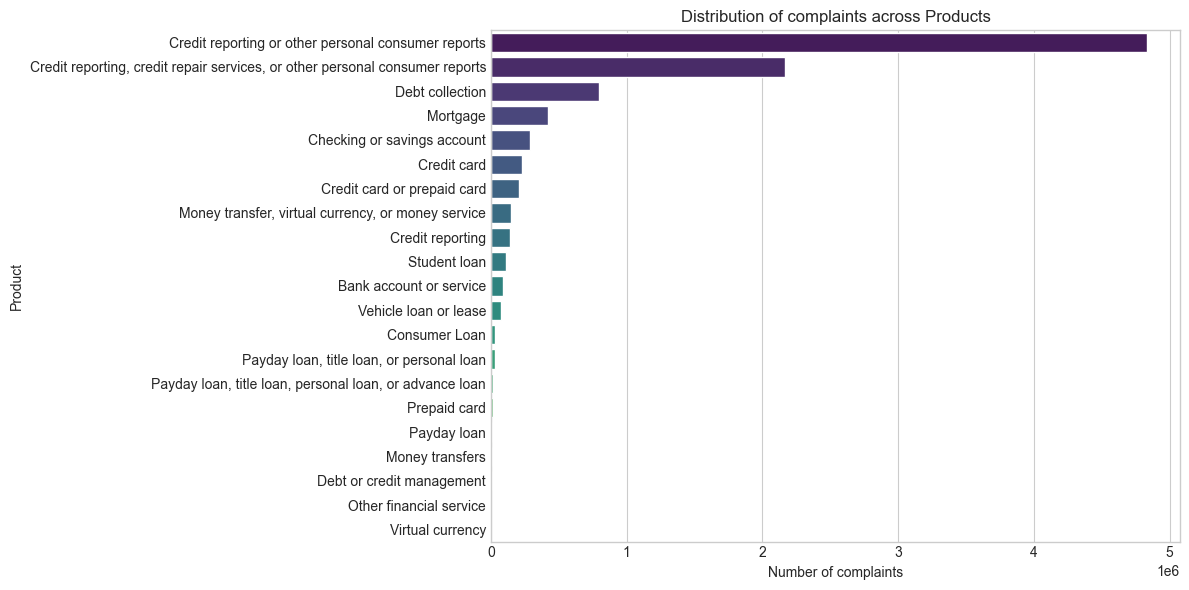

In [3]:
eda_mod.plot_product_distribution(df_raw)

### Narrative presence analysis.

In [4]:
presence = eda_mod.narrative_presence_analysis(df_raw)
print(f"Narrative Presence Analysis:\n{presence}")

Narrative Presence Analysis:
{'total': 9609797, 'with_narrative': 2980756, 'without_narrative': 6629041, 'percentage_with': 31.017887266505213}


## 2. Preprocessing & Sampling

### Full Preprocessing Pipeline

In [5]:
df_processed = preprocess_data(df_raw)
print(f"\nFinal processed dataset shape: {df_processed.shape}")

Starting preprocessing pipeline...


c:\Users\Acer\Documents\KAIM_PROJECT\TEST\rag-complaint-chatbot\src\preprocess.py:73: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = mask | df["Product"].astype(str).str.contains(p, case=False, na=False)


✓ Filtered products: kept 776,742 rows for products: ['Credit card', 'Personal loan', 'Buy Now, Pay Later (BNPL)', 'Savings account', 'Money transfers']
✓ Dropped 419,458 rows with empty narratives; 357,284 remain
✓ Dropped PII columns: ['ZIP code', 'Tags', 'Consumer consent provided?', 'Company public response']
✓ Cleaned narratives

Final processed dataset shape: (357284, 16)


### Stratified Sampling
Create a stratified sample of 10,000-15,000 complaints to ensure proportional representation.

In [6]:
# Create a stratified sample of 12,000 complaints
df_sampled = create_stratified_sample(df_processed, target_size=12000)

print(f"\nSampled dataset shape: {df_sampled.shape}")

✓ Created stratified sample: 12,000 rows

Proportional Representation Check (Product %):
                                                         Original %  Sample %
Product                                                                      
Checking or savings account                                   39.27     39.28
Credit card                                                   22.58     22.58
Credit card or prepaid card                                   30.41     30.42
Money transfers                                                0.42      0.42
Payday loan, title loan, or personal loan                      4.82      4.82
Payday loan, title loan, personal loan, or advance loan        2.49      2.49

Sampled dataset shape: (12000, 16)


### Narrative length distribution (on cleaned narratives).

Narrative Length Stats:
count    12000.000000
mean       216.481667
std        233.564411
min          2.000000
25%         78.000000
50%        155.000000
75%        271.000000
max       6533.000000
Name: clean_narrative, dtype: float64

Very short narratives (< 5 words): 6
Very long narratives (> 500 words): 968


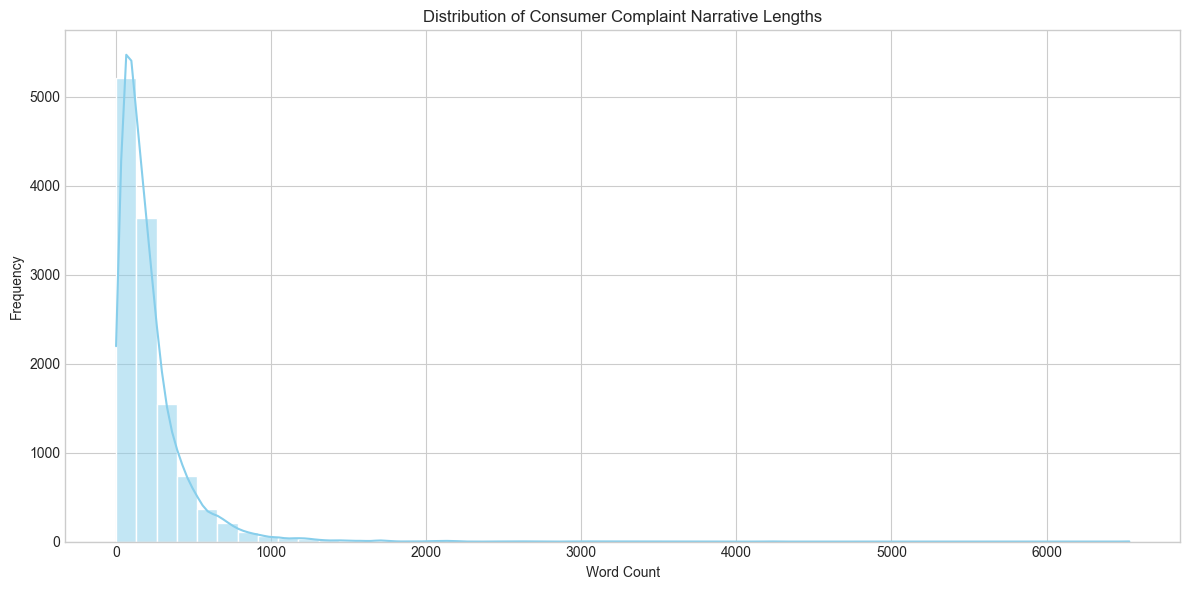

In [7]:
eda_mod.plot_narrative_length_distribution(df_sampled)

### Sample of Cleaned Narratives.

In [8]:
sample_row = df_sampled.iloc[0]
print("RAW NARRATIVE:")
print(sample_row['Consumer complaint narrative'])
print("\nCLEANED NARRATIVE:")
print(sample_row['clean_narrative'])
print(f"\nWord Count: {sample_row['narrative_word_count']}")

RAW NARRATIVE:
During the whole time that I had Wells Fargo Ive experienced on going issues that has never been res & was forced to close my account with a balance that did not belong to me. Theres been a lot of unauthorized transactions & money being withdrawn from my account and nobody knew why.

CLEANED NARRATIVE:
during the whole time that i had wells fargo ive experienced on going issues that has never been res was forced to close my account with a balance that did not belong to me. theres been a lot of unauthorized transactions money being withdrawn from my account and nobody knew why.

Word Count: 51


## 3. Save Processed Data

In [9]:
save_path = project_root / "data" / "processed" / "filtered_complaints.csv"
save_processed_data(df_sampled, save_path)
print(f"✓ Sampled data saved to {save_path}")

✓ Saved 12,000 DATA to filtered_complaints.csv
✓ Sampled data saved to c:\Users\Acer\Documents\KAIM_PROJECT\TEST\rag-complaint-chatbot\data\processed\filtered_complaints.csv
